In [1]:
import sys
sys.path.append('../')  # Add the parent directory to the system path


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.preprocess import DataProcessor

In [3]:
df = pd.read_xml("../data/KUH.XML")
df.head(2)

,StringValue,NumberOfParameters,Service,TechnicalEventType,TechnicalID,Description,TimeStamp,ProcessName,MemoField
0,Memo-field,NaN,None,None,NaN,None,None,None,None
1,None,226502.0,None,None,NaN,None,None,None,None


In [4]:
processor = DataProcessor()
df_large , df_small =  processor.prep_data(df)

Extracting Data from Message Column.......


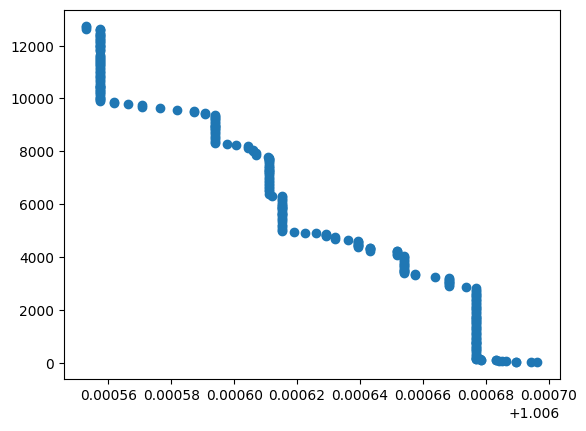

In [108]:
import scipy
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values
# np.polyfit(x ,y , len(x))
# scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(1e-4, 1e-6))
x.shape , y.shape
plt.scatter(x , y)

In [60]:
from sklearn.preprocessing import MinMaxScaler

std_X =   MinMaxScaler(feature_range=(1,6))

std_y =   MinMaxScaler(feature_range=(1,6))

In [68]:
import numpy as np
import matplotlib.pyplot as plt
# df_large = pd.read_csv("../data/df_large_prep.csv",index_col=0)
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values

y = -np.log(y)

x = std_X.fit_transform(x.reshape(-1,1))

y = std_y.fit_transform(y.reshape(-1,1))
x.shape , y[:,0].shape
# plt.scatter(x , y )

((294, 1), (294,))

[0.47649384 0.27163473]
2.773989375133827


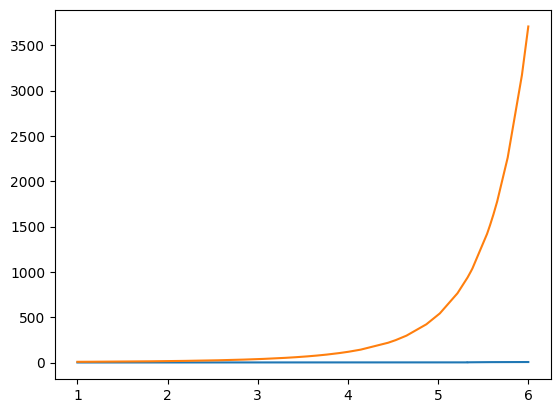

In [70]:
from sklearn.metrics import mean_squared_error as mse
## try normalization

def pred(coefs , x ):
    intercept , slope = coefs
    preds = np.exp(intercept) * np.exp(slope * x) 
    return preds


# x = np.array([10, 19, 30, 35, 51])
# y = np.array([1, 7, 20, 50, 79])
# np.polyfit(x, np.log(y), 1)
#    y ≈ exp(-0.401) * exp(0.105 * x) = 0.670 * exp(0.105 * x)
# (^ biased towards small values)
coefs = np.polyfit(x.ravel(), y.ravel(), 1)#, w=np.sqrt(y.reshape(-1)))
print(coefs)

preds = pred(coefs ,x)

rmse = mse(y , preds ,squared=False)
print(rmse)

plt.plot(x , y)
plt.plot(x , np.exp(preds))

In [84]:
fail_point = 0.9053574604
std_y.inverse_transform(pred(coefs , std_X.transform(np.array([fail_point]).reshape(-1,1))).reshape(-1,1))

array([[-12.78297719]])

In [85]:
coefs

array([0.50261661, 0.1979786 ])

In [86]:
p = np.poly1d(coefs)
std_y.inverse_transform(p( std_X.transform(np.array([fail_point]).reshape(-1,1))).reshape(-1,1))

array([[-506.58410855]])

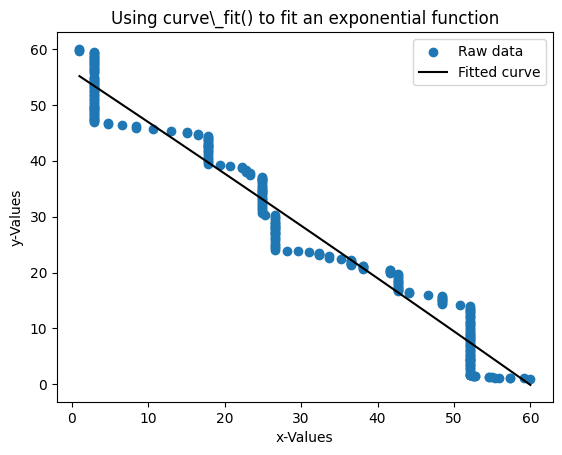

In [59]:
from scipy.optimize import curve_fit
# Have an initial guess as to what the values of the parameters are
a_guess = 5
b_guess = 0.6
c_guess = 42

kk=-1
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values

# y = -np.log(y)


from sklearn.preprocessing import MinMaxScaler

std_X =   MinMaxScaler(feature_range=(1,60))
std_y =   MinMaxScaler(feature_range=(1,60))


x_scaled = std_X.fit_transform(x.reshape(-1,1)).reshape(-1)

y_scaled = std_y.fit_transform(y.reshape(-1,1)).reshape(-1)

# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(
    lambda t, a, b, c: a * np.exp(b * t) + c,
    x_scaled, y_scaled, p0=(a_guess, b_guess, c_guess)
)



a = popt[0]
b = popt[1]
c = popt[2]


x_fitted = np.linspace(np.min(x_scaled), np.max(x_scaled), 100)
y_fitted =   a * np.exp(b * x_fitted) + c
# y_fitted = np.exp(y_fitted)

# Plot
ax = plt.axes()
ax.scatter(x_scaled, y_scaled, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title(r'Using curve\_fit() to fit an exponential function')
ax.set_ylabel('y-Values')
# ax.set_ylim(0, 500)
ax.set_xlabel('x-Values')
ax.legend()

In [16]:
y[:5] , y_scaled[:5]

(array([-2.77258872, -3.29583687, -3.66356165, -3.66356165, -3.95124372]),
 array([6.        , 5.60830067, 5.33302487, 5.33302487, 5.1176684 ]))

(294, 5)
(283, 5)


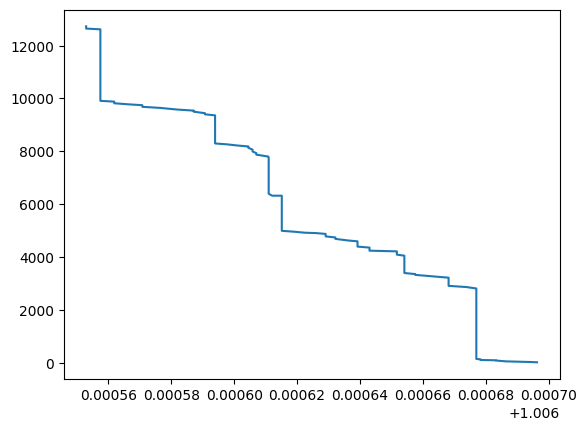

In [53]:
df_uni = df_large.copy()
print(df_uni.shape)
# plt.plot(df_uni.NewCFactor.values , df_uni.N_Pulses_Cum.values)

df_uni = df_uni.drop_duplicates(subset = "N_Pulses_Cum",)
print(df_uni.shape)

plt.plot(df_uni.NewCFactor.values , df_uni.N_Pulses_Cum.values)


In [54]:
df_large.N_Pulses_Cum.nunique()


283